# GROUP-3
#MD Fakrul Islam (613839)
#Adama Daffeh (613827) 
#Raj Kumar Thapa (613819)
#Adane Nigus (112351) 

# Inferencing Test Start

In [ ]:
import os, sys, math, time
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from time import perf_counter
from os.path import join
from glob import glob


from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image
#from keras.applications import vgg16


print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.1


In [ ]:
def getListSize(itel_list):
    count = 0
    for img_path in itel_list:  
        count = count + 1
    return count

print('Loaded function getListSize')

Loaded function getListSize


In [ ]:
CLASSES = ['EARLY BLIGHT', 'HEALTHY', 'LATE BLIGHT']
print('CLASSES: ',CLASSES)

CLASSES_D = {'EARLY BLIGHT':0, 'HEALTHY':1, 'LATE BLIGHT':2}
print(CLASSES_D)

potato_actual  = []
potato_predict = []

CLASSES:  ['EARLY BLIGHT', 'HEALTHY', 'LATE BLIGHT']
{'EARLY BLIGHT': 0, 'HEALTHY': 1, 'LATE BLIGHT': 2}


In [ ]:
def infer_request(IMAGE_PATH, IMG_HEIGHT,IMG_WIDTH ):
    t1_start = perf_counter()
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    images = np.expand_dims(image_array, axis=0)
    predictions = saved_model.predict(images)
    t1_stop = perf_counter() 
    execution_time=t1_stop-t1_start
    return execution_time, np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist()

print('Load the function infer request')

Load the function infer request


In [ ]:
t1_start = perf_counter()

SAVED_MODEL_PATH = '/home/fakrul/Downloads/150-20201027T230825Z-001/150/VGG16_Potato.h5'

# Recreate the exact same model, including its weights and the optimizer
saved_model = tf.keras.models.load_model(SAVED_MODEL_PATH)

t1_stop = perf_counter() 

_model_load_time = t1_stop - t1_start

# Show the model architecture
print(saved_model.summary())
print(saved_model.input_shape)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 1539      
Total params: 18,911,043
Trainable params: 4,196,355
Non-trainable params: 14,714,688
_________________________________________________________________
None
(None, 150, 150, 3)


In [ ]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMAGE_SIZE = [IMG_HEIGHT, IMG_WIDTH]

actual = [] 
predicted = [] 

print('Image Dimension and Class/Label Loaded')

Image Dimension and Class/Label Loaded


# Confusion Matrix Development Potato Diseases-Early Blight Leaves

In [ ]:
VALIDATE_EarlyBlight_LOCATION_IMAGES='/home/fakrul/image_duplicate_lab/Dataset/Potato/val/EarlyBlight'
ValEarlyBlightFiles = []

t1_start = perf_counter()
for ext in ('*.JPEG', '*.JPG', '*.jpg', 'jpeg'):
    ValEarlyBlightFiles.extend(glob(join(VALIDATE_EarlyBlight_LOCATION_IMAGES, ext)))
    

t1_stop = perf_counter() 
image_load_latency=t1_stop-t1_start
image_load_latency = image_load_latency + _model_load_time

print("Elapsed time Image Load:", round(image_load_latency,2), 'Seconds')  
print("Total Inference files:", getListSize(ValEarlyBlightFiles))


Elapsed time Image Load: 0.33 Seconds
Total Inference files: 356


In [ ]:
#Inference all validation images by scaling 5
#CLASSES = ['EARLY_BLIGHT', 'LATE_BLIGHT', 'HEALTHY']
early_blight_actual = [] 
early_blight_predicted = [] 



main_counter=1
total_time= image_load_latency

for IMAGE_PATH in ValEarlyBlightFiles:
    for i in range(1, 2):        
        _time, _lebel=infer_request(IMAGE_PATH, IMG_HEIGHT, IMG_WIDTH)
        total_time = total_time+_time
        _temp = str(_lebel[0])
        _pos  = CLASSES_D[_temp]
        print('_temp: {}'.format(_temp))
        print('_pos: {}'.format(_pos))
        #potato_actual.append(0)
        potato_actual.append('EARLY BLIGHT')
        #potato_predict.append(_pos)        
        potato_predict.append(_temp)        
        if _pos == 0:
            actual.append(1)
            predicted.append(1)
            early_blight_actual.append(1)
            early_blight_predicted.append(1)
        else:
            actual.append(1)
            predicted.append(0)
            early_blight_actual.append(1)
            early_blight_predicted.append(0)
            
    print('Turn No: ', main_counter)
    main_counter = main_counter+1


print('Total Time Required: ',round(total_time,2), 'Seconds')
print('Actual: ', actual)
print('Prdicted: ', predicted)
print('early_blight_actual: ', early_blight_actual)
print('early_blight_predicted: ', early_blight_predicted)

_temp: EARLY BLIGHT
_pos: 0
Turn No:  1
_temp: EARLY BLIGHT
_pos: 0
Turn No:  2
_temp: EARLY BLIGHT
_pos: 0
Turn No:  3
_temp: EARLY BLIGHT
_pos: 0
Turn No:  4
_temp: EARLY BLIGHT
_pos: 0
Turn No:  5
_temp: EARLY BLIGHT
_pos: 0
Turn No:  6
_temp: EARLY BLIGHT
_pos: 0
Turn No:  7
_temp: EARLY BLIGHT
_pos: 0
Turn No:  8
_temp: EARLY BLIGHT
_pos: 0
Turn No:  9
_temp: EARLY BLIGHT
_pos: 0
Turn No:  10
_temp: EARLY BLIGHT
_pos: 0
Turn No:  11
_temp: EARLY BLIGHT
_pos: 0
Turn No:  12
_temp: EARLY BLIGHT
_pos: 0
Turn No:  13
_temp: EARLY BLIGHT
_pos: 0
Turn No:  14
_temp: EARLY BLIGHT
_pos: 0
Turn No:  15
_temp: EARLY BLIGHT
_pos: 0
Turn No:  16
_temp: EARLY BLIGHT
_pos: 0
Turn No:  17
_temp: EARLY BLIGHT
_pos: 0
Turn No:  18
_temp: EARLY BLIGHT
_pos: 0
Turn No:  19
_temp: EARLY BLIGHT
_pos: 0
Turn No:  20
_temp: EARLY BLIGHT
_pos: 0
Turn No:  21
_temp: EARLY BLIGHT
_pos: 0
Turn No:  22
_temp: EARLY BLIGHT
_pos: 0
Turn No:  23
_temp: EARLY BLIGHT
_pos: 0
Turn No:  24
_temp: EARLY BLIGHT
_pos:

_temp: EARLY BLIGHT
_pos: 0
Turn No:  201
_temp: EARLY BLIGHT
_pos: 0
Turn No:  202
_temp: EARLY BLIGHT
_pos: 0
Turn No:  203
_temp: EARLY BLIGHT
_pos: 0
Turn No:  204
_temp: EARLY BLIGHT
_pos: 0
Turn No:  205
_temp: EARLY BLIGHT
_pos: 0
Turn No:  206
_temp: EARLY BLIGHT
_pos: 0
Turn No:  207
_temp: EARLY BLIGHT
_pos: 0
Turn No:  208
_temp: EARLY BLIGHT
_pos: 0
Turn No:  209
_temp: EARLY BLIGHT
_pos: 0
Turn No:  210
_temp: EARLY BLIGHT
_pos: 0
Turn No:  211
_temp: EARLY BLIGHT
_pos: 0
Turn No:  212
_temp: EARLY BLIGHT
_pos: 0
Turn No:  213
_temp: EARLY BLIGHT
_pos: 0
Turn No:  214
_temp: EARLY BLIGHT
_pos: 0
Turn No:  215
_temp: EARLY BLIGHT
_pos: 0
Turn No:  216
_temp: EARLY BLIGHT
_pos: 0
Turn No:  217
_temp: EARLY BLIGHT
_pos: 0
Turn No:  218
_temp: EARLY BLIGHT
_pos: 0
Turn No:  219
_temp: EARLY BLIGHT
_pos: 0
Turn No:  220
_temp: EARLY BLIGHT
_pos: 0
Turn No:  221
_temp: EARLY BLIGHT
_pos: 0
Turn No:  222
_temp: EARLY BLIGHT
_pos: 0
Turn No:  223
_temp: EARLY BLIGHT
_pos: 0
Turn N

# Confusion Matrix Development Potato Diseases-Healthy Leaves

In [ ]:
VALIDATE_Healthy_LOCATION_IMAGES='/home/fakrul/image_duplicate_lab/Dataset/Potato/val/Healthy'
ValHealthyFiles = []

t1_start = perf_counter()
for ext in ('*.JPEG', '*.JPG', '*.jpg', 'jpeg'):
    ValHealthyFiles.extend(glob(join(VALIDATE_Healthy_LOCATION_IMAGES, ext)))
    

t1_stop = perf_counter() 
image_load_latency=t1_stop-t1_start
image_load_latency = image_load_latency + _model_load_time

print("Elapsed time Image Load:", round(image_load_latency,2), 'Seconds')  
print("Total Inference files:", getListSize(ValHealthyFiles))


Elapsed time Image Load: 0.33 Seconds
Total Inference files: 303


In [ ]:
#Inference all validation images by scaling 10
#CLASSES = ['EARLY_BLIGHT', 'LATE_BLIGHT', 'HEALTHY']

healthy_actual=[]
healthy_predicted=[]

main_counter=1
total_time= image_load_latency

for IMAGE_PATH in ValHealthyFiles:
    for i in range(1, 2):        
        _time, _lebel=infer_request(IMAGE_PATH, IMG_HEIGHT, IMG_WIDTH)
        total_time = total_time+_time
        _temp = str(_lebel[0])
        _pos  = CLASSES_D[_temp]
        print('_temp: {}'.format(_temp))
        print('_pos: {}'.format(_pos))        
        #potato_actual.append(2)
        potato_actual.append('HEALTHY')
        #potato_predict.append(_pos)                
        potato_predict.append(_temp) 
        if _pos == 1:
            actual.append(1)
            predicted.append(1)
            healthy_actual.append(1)
            healthy_predicted.append(1)
        else:
            actual.append(1)
            predicted.append(0)
            healthy_actual.append(1)
            healthy_predicted.append(0)
            
    print('Turn No: ', main_counter)
    main_counter = main_counter+1


print('Total Time Required: ',round(total_time,2), 'Seconds')
print('Actual: ', actual)
print('Prdicted: ', predicted)
print('healthy_actual: ', healthy_actual)
print('healthy_predicted: ', healthy_predicted)

_temp: HEALTHY
_pos: 1
Turn No:  1
_temp: HEALTHY
_pos: 1
Turn No:  2
_temp: HEALTHY
_pos: 1
Turn No:  3
_temp: EARLY BLIGHT
_pos: 0
Turn No:  4
_temp: HEALTHY
_pos: 1
Turn No:  5
_temp: HEALTHY
_pos: 1
Turn No:  6
_temp: HEALTHY
_pos: 1
Turn No:  7
_temp: HEALTHY
_pos: 1
Turn No:  8
_temp: HEALTHY
_pos: 1
Turn No:  9
_temp: HEALTHY
_pos: 1
Turn No:  10
_temp: HEALTHY
_pos: 1
Turn No:  11
_temp: EARLY BLIGHT
_pos: 0
Turn No:  12
_temp: HEALTHY
_pos: 1
Turn No:  13
_temp: HEALTHY
_pos: 1
Turn No:  14
_temp: HEALTHY
_pos: 1
Turn No:  15
_temp: HEALTHY
_pos: 1
Turn No:  16
_temp: HEALTHY
_pos: 1
Turn No:  17
_temp: HEALTHY
_pos: 1
Turn No:  18
_temp: HEALTHY
_pos: 1
Turn No:  19
_temp: HEALTHY
_pos: 1
Turn No:  20
_temp: EARLY BLIGHT
_pos: 0
Turn No:  21
_temp: HEALTHY
_pos: 1
Turn No:  22
_temp: HEALTHY
_pos: 1
Turn No:  23
_temp: EARLY BLIGHT
_pos: 0
Turn No:  24
_temp: EARLY BLIGHT
_pos: 0
Turn No:  25
_temp: HEALTHY
_pos: 1
Turn No:  26
_temp: HEALTHY
_pos: 1
Turn No:  27
_temp: HEALT

_temp: HEALTHY
_pos: 1
Turn No:  225
_temp: HEALTHY
_pos: 1
Turn No:  226
_temp: HEALTHY
_pos: 1
Turn No:  227
_temp: HEALTHY
_pos: 1
Turn No:  228
_temp: HEALTHY
_pos: 1
Turn No:  229
_temp: EARLY BLIGHT
_pos: 0
Turn No:  230
_temp: HEALTHY
_pos: 1
Turn No:  231
_temp: EARLY BLIGHT
_pos: 0
Turn No:  232
_temp: HEALTHY
_pos: 1
Turn No:  233
_temp: HEALTHY
_pos: 1
Turn No:  234
_temp: HEALTHY
_pos: 1
Turn No:  235
_temp: HEALTHY
_pos: 1
Turn No:  236
_temp: HEALTHY
_pos: 1
Turn No:  237
_temp: HEALTHY
_pos: 1
Turn No:  238
_temp: HEALTHY
_pos: 1
Turn No:  239
_temp: HEALTHY
_pos: 1
Turn No:  240
_temp: HEALTHY
_pos: 1
Turn No:  241
_temp: HEALTHY
_pos: 1
Turn No:  242
_temp: HEALTHY
_pos: 1
Turn No:  243
_temp: HEALTHY
_pos: 1
Turn No:  244
_temp: HEALTHY
_pos: 1
Turn No:  245
_temp: HEALTHY
_pos: 1
Turn No:  246
_temp: HEALTHY
_pos: 1
Turn No:  247
_temp: HEALTHY
_pos: 1
Turn No:  248
_temp: HEALTHY
_pos: 1
Turn No:  249
_temp: HEALTHY
_pos: 1
Turn No:  250
_temp: HEALTHY
_pos: 1
Turn 

# Confusion Matrix Development Potato Diseases-Late Blight Leaves

In [ ]:
VALIDATE_LateBlight_LOCATION_IMAGES='/home/fakrul/image_duplicate_lab/Dataset/Potato/val/LateBlight'
ValLateBlightFiles = []

t1_start = perf_counter()
for ext in ('*.JPEG', '*.JPG', '*.jpg', 'jpeg'):
    ValLateBlightFiles.extend(glob(join(VALIDATE_LateBlight_LOCATION_IMAGES, ext)))
    

t1_stop = perf_counter() 
image_load_latency=t1_stop-t1_start
image_load_latency = image_load_latency + _model_load_time

print("Elapsed time Image Load:", round(image_load_latency,2), 'Seconds')  
print("Total Inference files:", getListSize(ValLateBlightFiles))


Elapsed time Image Load: 0.33 Seconds
Total Inference files: 356


In [ ]:
#CLASSES = ['EARLY_BLIGHT', 'LATE_BLIGHT', 'HEALTHY']
late_blight_actual=[]
late_blight_predicted=[]

main_counter=1
total_time= image_load_latency

for IMAGE_PATH in ValLateBlightFiles:
    for i in range(1, 2):        
        _time, _lebel=infer_request(IMAGE_PATH, IMG_HEIGHT, IMG_WIDTH)
        total_time = total_time+_time
        _temp = str(_lebel[0])
        _pos  = CLASSES_D[_temp]
        print('_temp: {}'.format(_temp))
        print('_pos: {}'.format(_pos))        
        #potato_actual.append(1)
        potato_actual.append('LATE BLIGHT')
        #potato_predict.append(_pos)     
        potato_predict.append(_temp)
        if _pos == 2:
            actual.append(1)
            predicted.append(1)
            late_blight_actual.append(1)
            late_blight_predicted.append(1)
        else:
            actual.append(1)
            predicted.append(0)
            late_blight_actual.append(1)
            late_blight_predicted.append(0)
            
    print('Turn No: ', main_counter)
    main_counter = main_counter+1


print('Total Time Required: ', round(total_time,2), 'Seconds')
print('Actual: ', actual)
print('Prdicted: ', predicted)
print('late_blight_actual: ', late_blight_actual)
print('late_blight_predicted: ', late_blight_predicted)

_temp: EARLY BLIGHT
_pos: 0
Turn No:  1
_temp: EARLY BLIGHT
_pos: 0
Turn No:  2
_temp: HEALTHY
_pos: 1
Turn No:  3
_temp: EARLY BLIGHT
_pos: 0
Turn No:  4
_temp: EARLY BLIGHT
_pos: 0
Turn No:  5
_temp: HEALTHY
_pos: 1
Turn No:  6
_temp: EARLY BLIGHT
_pos: 0
Turn No:  7
_temp: EARLY BLIGHT
_pos: 0
Turn No:  8
_temp: EARLY BLIGHT
_pos: 0
Turn No:  9
_temp: HEALTHY
_pos: 1
Turn No:  10
_temp: EARLY BLIGHT
_pos: 0
Turn No:  11
_temp: EARLY BLIGHT
_pos: 0
Turn No:  12
_temp: LATE BLIGHT
_pos: 2
Turn No:  13
_temp: EARLY BLIGHT
_pos: 0
Turn No:  14
_temp: HEALTHY
_pos: 1
Turn No:  15
_temp: EARLY BLIGHT
_pos: 0
Turn No:  16
_temp: EARLY BLIGHT
_pos: 0
Turn No:  17
_temp: EARLY BLIGHT
_pos: 0
Turn No:  18
_temp: EARLY BLIGHT
_pos: 0
Turn No:  19
_temp: HEALTHY
_pos: 1
Turn No:  20
_temp: EARLY BLIGHT
_pos: 0
Turn No:  21
_temp: EARLY BLIGHT
_pos: 0
Turn No:  22
_temp: EARLY BLIGHT
_pos: 0
Turn No:  23
_temp: EARLY BLIGHT
_pos: 0
Turn No:  24
_temp: EARLY BLIGHT
_pos: 0
Turn No:  25
_temp: EAR

_temp: HEALTHY
_pos: 1
Turn No:  204
_temp: EARLY BLIGHT
_pos: 0
Turn No:  205
_temp: EARLY BLIGHT
_pos: 0
Turn No:  206
_temp: HEALTHY
_pos: 1
Turn No:  207
_temp: EARLY BLIGHT
_pos: 0
Turn No:  208
_temp: EARLY BLIGHT
_pos: 0
Turn No:  209
_temp: EARLY BLIGHT
_pos: 0
Turn No:  210
_temp: EARLY BLIGHT
_pos: 0
Turn No:  211
_temp: HEALTHY
_pos: 1
Turn No:  212
_temp: EARLY BLIGHT
_pos: 0
Turn No:  213
_temp: EARLY BLIGHT
_pos: 0
Turn No:  214
_temp: EARLY BLIGHT
_pos: 0
Turn No:  215
_temp: EARLY BLIGHT
_pos: 0
Turn No:  216
_temp: EARLY BLIGHT
_pos: 0
Turn No:  217
_temp: EARLY BLIGHT
_pos: 0
Turn No:  218
_temp: EARLY BLIGHT
_pos: 0
Turn No:  219
_temp: EARLY BLIGHT
_pos: 0
Turn No:  220
_temp: EARLY BLIGHT
_pos: 0
Turn No:  221
_temp: HEALTHY
_pos: 1
Turn No:  222
_temp: EARLY BLIGHT
_pos: 0
Turn No:  223
_temp: EARLY BLIGHT
_pos: 0
Turn No:  224
_temp: EARLY BLIGHT
_pos: 0
Turn No:  225
_temp: EARLY BLIGHT
_pos: 0
Turn No:  226
_temp: EARLY BLIGHT
_pos: 0
Turn No:  227
_temp: EARLY

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

# Confusion Matrix Classification Report and Heatmaps

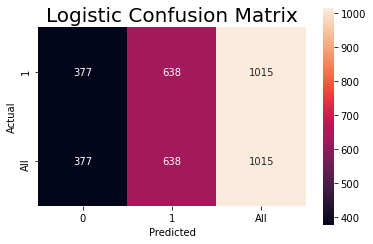

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    actual, 'y_Predicted': predicted }
plt.title("Logistic Confusion Matrix", fontsize =20)

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
my_confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(my_confusion_matrix, annot=True, fmt="d", square=True)
plt.show()

# Confusion Matrix-Early Blight

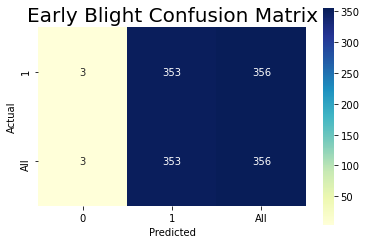

In [ ]:
data = {'y_Actual':    early_blight_actual, 'y_Predicted': early_blight_predicted }
plt.title("Early Blight Confusion Matrix", fontsize =20)

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
my_confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(my_confusion_matrix, cmap="YlGnBu", annot=True, fmt="d", square=True)
plt.show()

# Confusion Matrix- Late Blight

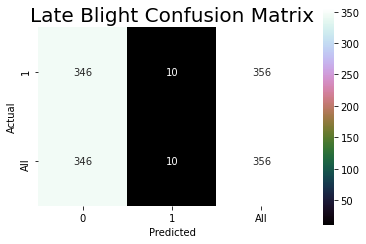

In [ ]:
data = {'y_Actual':    late_blight_actual, 'y_Predicted': late_blight_predicted }
plt.title("Late Blight Confusion Matrix", fontsize =20)

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
my_confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(my_confusion_matrix, annot=True, cmap="cubehelix", fmt="d", square=True)
plt.show()

# Confusion Matrix- Healthy

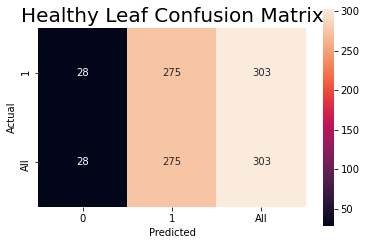

In [ ]:
data = {'y_Actual':    healthy_actual, 'y_Predicted': healthy_predicted }
plt.title("Healthy Leaf Confusion Matrix", fontsize =20)

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
my_confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(my_confusion_matrix, annot=True, fmt="d", square=True)
plt.show()

In [ ]:
#CLASSES = ['EARLY_BLIGHT', 'LATE_BLIGHT', 'HEALTHY']
confusion_matrix(potato_actual, potato_predict)

array([[353,   3,   0],
       [ 28, 275,   0],
       [285,  61,  10]])

# CLASSES = ['EARLY_BLIGHT', 'LATE_BLIGHT', 'HEALTHY']

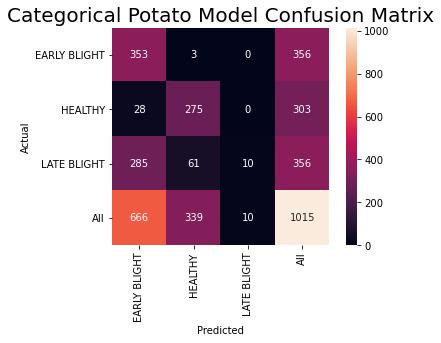

In [ ]:
data = {'y_Actual':    potato_actual, 'y_Predicted': potato_predict }
plt.title("Categorical Potato Model Confusion Matrix", fontsize =20)

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
my_confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(my_confusion_matrix, annot=True, fmt="d", square=True)
plt.show()

In [ ]:
print ('Accuracy Score :',accuracy_score(potato_actual, potato_predict) )
print ('Report : ')
print (classification_report(potato_actual, potato_predict))

Accuracy Score : 0.6285714285714286
Report : 
              precision    recall  f1-score   support

EARLY BLIGHT       0.53      0.99      0.69       356
     HEALTHY       0.81      0.91      0.86       303
 LATE BLIGHT       1.00      0.03      0.05       356

    accuracy                           0.63      1015
   macro avg       0.78      0.64      0.53      1015
weighted avg       0.78      0.63      0.52      1015



# Definition of the Terms:
Positive (P) : Observation is positive (for example: is an apple). Negative (N) : Observation is not positive (for example: is not an apple). True Positive (TP) : Observation is positive, and is predicted to be positive. False Negative (FN) : Observation is positive, but is predicted negative. True Negative (TN) : Observation is negative, and is predicted to be negative. False Positive (FP) : Observation is negative, but is predicted positive.

Classification Rate/Accuracy: Accuracy = (TP + TN) / (TP + TN + FP + FN)

Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes. Recall = TP / (TP + FN)

Precision: Precsion tells us about when it predicts yes, how often is it correct. Precision = TP / (TP + FP)

F-measure: Fmeasure = (2 * Recall * Precision) / (Recall + Presision)

High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)